In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import os
import random


In [5]:
test_path = os.path.join('final_data','test')
train_path = os.path.join('final_data','train')
if not os.path.exists(test_path):
    os.mkdir(test_path)
if not os.path.exists(train_path):
    os.mkdir(train_path)


labels = ['no_yawn','yawn']
for label in labels:
    file_list = os.listdir(os.path.join('cropped_data',label))
    length = len(file_list)
    print(length)
    test_data_len = int(length*0.2)
    path = os.path.join('cropped_data',label)
    if not os.path.exists(os.path.join(test_path,label)):
        os.mkdir(os.path.join(test_path,label))
    if not os.path.exists(os.path.join(train_path,label)):
        os.mkdir(os.path.join(train_path,label))
    for i in  file_list[:test_data_len]:
        shutil.copy(os.path.join(path,i),os.path.join(test_path,label))
        # shutil.move(os.path.join(path,i),os.path.join(test_path,label))
    for i in  file_list[test_data_len:]:
        shutil.copy(os.path.join(path,i),os.path.join(train_path,label))

        # shutil.move(os.path.join(path,i),os.path.join(train_path,label))



307
343


In [55]:
train_face_ds = keras.utils.image_dataset_from_directory(
    directory=r'final_data\train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(100, 100),
    shuffle=True)

val_face_ds = keras.utils.image_dataset_from_directory(
    directory=r'final_data\test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(100, 100),
    shuffle=True
)

Found 621 files belonging to 2 classes.
Found 136 files belonging to 2 classes.


In [7]:
for feature , label in train_face_ds:
    print(feature.shape)
    print()
    print(label.shape)
    break

(32, 256, 256, 3)

(32, 2)


In [8]:
for feature , label in val_face_ds:
    print(feature)
    print()
    print(label)
    break

tf.Tensor(
[[[[0.00000000e+00 2.55000000e+02 2.00000000e+00]
   [5.19531250e-01 2.55000000e+02 2.51953125e+00]
   [1.39843750e+00 2.55000000e+02 3.79687500e+00]
   ...
   [3.00000000e+00 2.55000000e+02 7.19921875e+00]
   [1.55859375e+00 2.55000000e+02 4.59765625e+00]
   [0.00000000e+00 2.55000000e+02 2.00000000e+00]]

  [[0.00000000e+00 2.55000000e+02 1.48046875e+00]
   [3.75848389e+00 2.54190262e+02 4.96903992e+00]
   [8.97831726e+00 2.51267899e+02 1.01306915e+01]
   ...
   [1.41110687e+01 2.45335907e+02 1.64391632e+01]
   [1.26574860e+01 2.48623566e+02 1.43672791e+01]
   [1.29882812e+01 2.52402344e+02 1.44687500e+01]]

  [[7.96875000e-01 2.55000000e+02 1.19921875e+00]
   [8.89628601e+00 2.51371399e+02 8.67559814e+00]
   [1.98909454e+01 2.41847626e+02 1.90146942e+01]
   ...
   [2.12747040e+01 2.12808914e+02 2.15548553e+01]
   [2.40027924e+01 2.26852875e+02 2.39089508e+01]
   [3.17734375e+01 2.43027344e+02 3.15781250e+01]]

  ...

  [[3.80078125e+00 2.54601562e+02 9.96093750e-01]
   [1

In [64]:
image_shape=(100,100,3)
image_size = 100

## Agumentation
resizing_rescaling = keras.models.Sequential([
    layers.Rescaling(1/256)
])

## Agumentation

data_agumentation = keras.models.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


input = layers.Input(shape = image_shape)
x = resizing_rescaling(input)
x = data_agumentation(x)
x = layers.Conv2D(32,3,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(32,3,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64,3,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(64,3,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3,3),)(x)
x = layers.Conv2D(64,3,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D((3,3),)(x)
x = layers.Flatten()(x)
x = layers.Dense(128,kernel_initializer='glorot_uniform')(x)
x = layers.Activation('relu')(x)
output = layers.Dense(2,activation='sigmoid')(x)

model = keras.Model(inputs = input, outputs = output)





In [65]:
def scheduler(epoch, lr):
    if epoch <= 15:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

model.compile(optimizer=tf.keras.optimizers.Nadam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'],
                )

In [66]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 sequential_11 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation_25 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 96, 96, 32)        0   

In [67]:
# callbacks = [tf.keras.callbacks.ModelCheckpoint('callbacks',monitor="val_loss",
#     save_best_only=True,
#     save_weights_only=True,)]
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
epochs = 50
history = model.fit(x = train_face_ds, 
                validation_data= val_face_ds,
                epochs= epochs,
                shuffle=True,
                callbacks = callback)

Epoch 1/30
20/20 [==============================] - 13s 529ms/step - loss: 0.7808 - accuracy: 0.6119 - val_loss: 0.6053 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 2/30
20/20 [==============================] - 11s 563ms/step - loss: 0.5311 - accuracy: 0.7456 - val_loss: 0.4773 - val_accuracy: 0.7868 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 12s 578ms/step - loss: 0.4722 - accuracy: 0.7681 - val_loss: 0.4461 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 13s 632ms/step - loss: 0.4577 - accuracy: 0.7746 - val_loss: 0.5222 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 12s 588ms/step - loss: 0.4565 - accuracy: 0.7697 - val_loss: 0.3898 - val_accuracy: 0.8088 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 12s 606ms/step - loss: 0.4361 - accuracy: 0.7874 - val_loss: 0.4054 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 12s 616ms/st

In [68]:
import pandas as pd
outputs = pd.DataFrame(history.history)

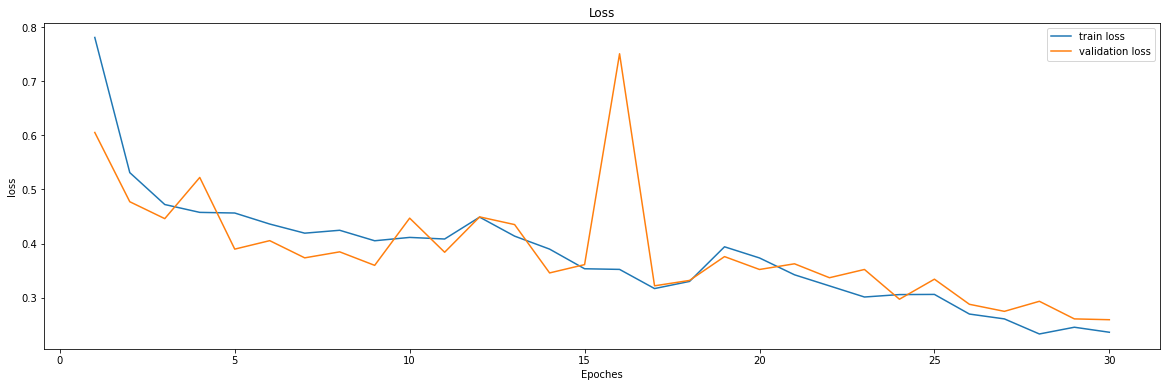

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
plt.plot(range(1,epochs+1),outputs['loss'], label = 'train loss')
plt.plot(range(1,epochs+1),outputs['val_loss'], label = 'validation loss')
plt.xlabel('Epoches')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.show()


In [53]:
outputs.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'], dtype='object')

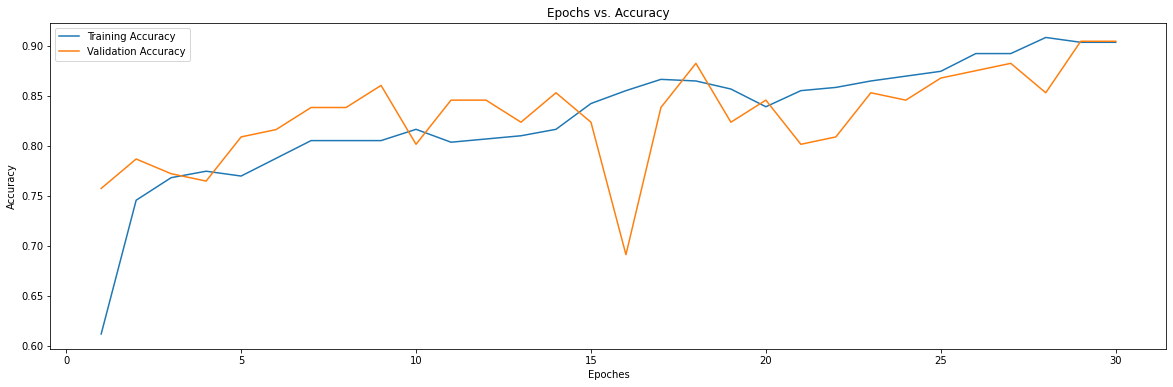

In [71]:
plt.figure(figsize = (20,6))
plt.plot(range(1,epochs+1),outputs['accuracy'],label = 'Training Accuracy')
plt.plot(range(1,epochs+1),outputs['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epochs vs. Accuracy')
plt.show()

In [72]:
model.save('saved_models\cnn_face.h5')